<a href="https://colab.research.google.com/github/premswaroopmusti/Support-Vector-Machine/blob/main/Support_Vector_Machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
df = pd.DataFrame(iris.data, columns= iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [6]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
df[df.target == 0].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df['flower_names'] = df.target.apply(lambda x: iris.target_names[x])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [9]:
import matplotlib.pyplot as plt

In [10]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [11]:
df2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_names
100,6.3,3.3,6.0,2.5,2,virginica
101,5.8,2.7,5.1,1.9,2,virginica
102,7.1,3.0,5.9,2.1,2,virginica
103,6.3,2.9,5.6,1.8,2,virginica
104,6.5,3.0,5.8,2.2,2,virginica


**Sepal length vs Sepal Width (Setosa vs Versicolor)**

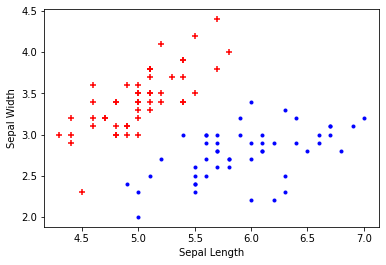

In [12]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'], color = 'red', marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = 'blue',marker = '.')

**Petal length vs Petal Width (Setosa vs Versicolor)**

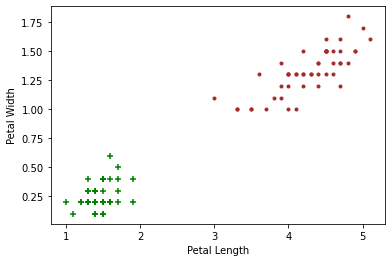

In [13]:
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'], color = 'green', marker = '+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color = 'brown',marker = '.')

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df.drop(['target','flower_names'], axis = 'columns')
Y = df.target

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)

In [17]:
len(X_train)

120

In [18]:
len(X_test)

30

In [19]:
from sklearn.svm import SVC
model = SVC()

In [20]:
model.fit(X_train, Y_train)

SVC()

In [21]:
model.score(X_test, Y_test)

0.9666666666666667

In [22]:
model.predict([[6.5	,3.0	,5.9,	2.3]])


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([2])

## **Tune parameters**

### 1. Regularization (C)

In [28]:
model_c = SVC(C = 1)
model_c.fit(X_train, Y_train)
model.score(X_test,Y_test)

0.9666666666666667

In [29]:
model_c = SVC(C = 10)
model_c.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9666666666666667

### 2. Gamma

In [32]:
model_g = SVC(gamma = 10)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.9666666666666667

### 3. Kernel

In [34]:
model_linear_kernel = SVC(kernel = 'linear')
model_linear_kernel.fit(X_train, Y_train)
model_linear_kernel.score(X_test, Y_test)

1.0

In [35]:
model_rbf_kernel = SVC(kernel = 'rbf')
model_rbf_kernel.fit(X_train, Y_train)
model_rbf_kernel.score(X_test, Y_test)

0.9666666666666667